In [67]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

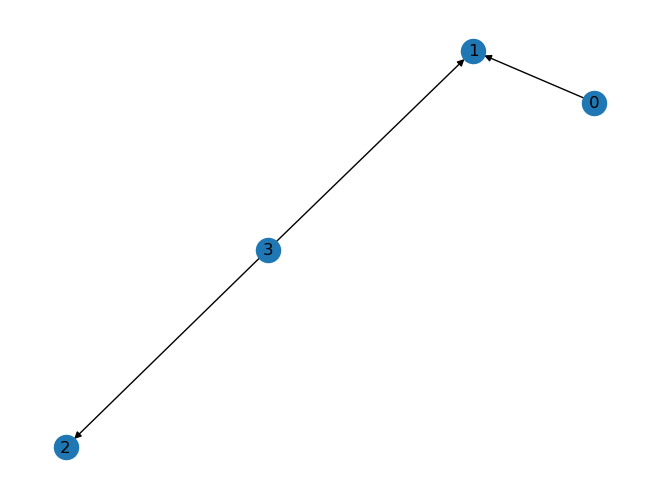

In [18]:
g = nx.DiGraph()
g.add_nodes_from([0,1,2,3])
g.add_edges_from([(0,1),(3,1),(3,2)])
nx.draw(g, with_labels=True)

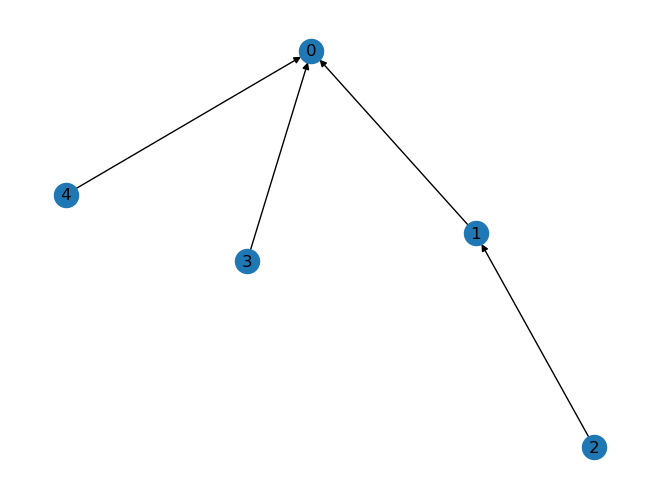

In [25]:
D = nx.gn_graph(5)
nx.draw(D, with_labels=True)

In [21]:
nx.d_separated(g, {0}, {2}, {})

True

In [141]:
def unblocked_path(g, path, Z):
    if not nx.is_path(g.to_undirected(), path):
        return False
    else:
        for x in path:
            parents_in_path=set(g.predecessors(x)).intersection(path)
            if x in Z:
                children_in_path=set(g.successors(x)).intersection(path)
                if len(children_in_path)>0 and len(parents_in_path)>0 or len(children_in_path)>1:
                    return False
            if x not in Z:
                no_desc_in_Z=nx.descendants(g,x).isdisjoint(Z)
                if no_desc_in_Z and len(parents_in_path)>1:
                        return False
        return True

def gen_dinfo(G):
    ns = list(G.nodes)
    start, end, cond = np.random.choice(ns,size=3,replace=False)
    return [set([start]), set([end]), set([cond])]
    
def main():
    for _ in range(1):
        # Random Digraph
        random_D = None
        while random_D is None or not (nx.is_directed_acyclic_graph(random_D) and nx.is_connected(random_D.to_undirected())):
            random_D = nx.fast_gnp_random_graph(10, 0.1, directed=True)
        
        # Draw it
        nx.draw(random_D, with_labels=True)
        plt.show()
        
        # Random starting, ending and conditional sets
        s, e, c = gen_dinfo(random_D)
        
        d_sep_answer = nx.d_separated(random_D, s, e, c)
        
        # Take the input from user
        d_sep_input = None
        while d_sep_input is None:
            d_sep_raw = input(f'Are {s} and {e} d-separated conditioned on {c}?').lower()
            if d_sep_raw in ['yes', 'true']:
                d_sep_input = True
            elif d_sep_raw in ['no', 'false']:
                d_sep_input = False
            else:
                print("Sorry, didn't catch that")
        
        if True == d_sep_answer == d_sep_input:
            print('Congrats!')
        elif d_sep_answer != d_sep_input:
            print('No! Try again')
        else: # Case in which it is not d-separated. So show the path.
            # Take the input from user
            unblocked_input = None
            while unblocked_input is None:
                unblocked_raw = input(f"Ok! Now give me one unblocked path between {s} and {e}").lower()
                if all([int(c) in list(random_D.nodes) for c in unblocked_raw]):
                    if (int(unblocked_raw[0]) in s) and (int(unblocked_raw[-1]) in e):
                        unblocked_input = [int(c) for c in unblocked_raw]
                    else:
                        print(f"You have to start at {s} and end at {e}!")    
                else:
                    print('Not a list of nodes!')
            
            if unblocked_path(random_D, unblocked_input, c):
                print('Congrats!!')
            else:
                print('Oh no :(')

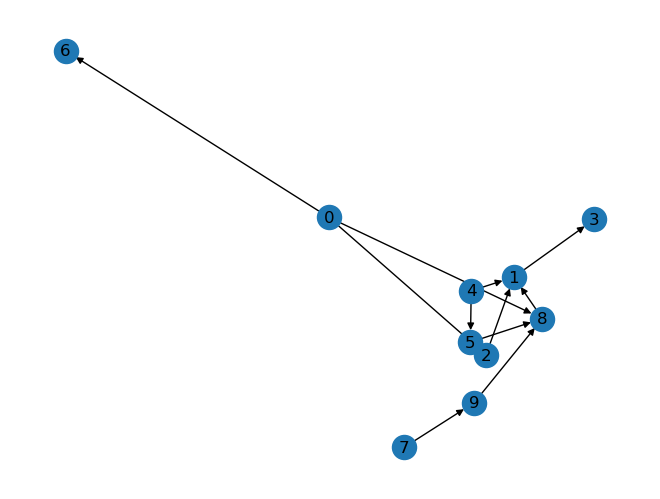

Are {8} and {4} d-separated conditioned on {3}?no
Ok! Now give me one unblocked path between {8} and {4}814
Congrats!!


In [142]:
main()

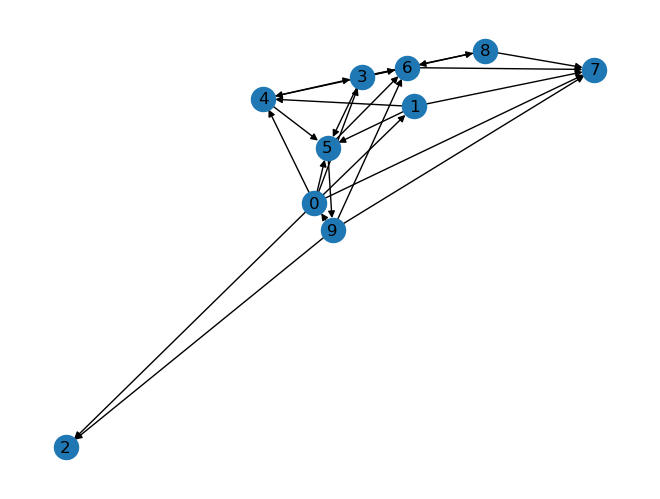

[{1}, {6}, {2}]


In [127]:
G = nx.fast_gnp_random_graph(10, 0.2, directed=True)
nx.draw(G, with_labels=True)
plt.show()
print(gen_dinfo(G))